## Chapter 1.9a: Fault relations
***
A first example to show, which relation between faults and series can be represenented by GemPy. A set of thre horizontally deposited units is offset by a single fault. Two younger units deposited on top of these units, filling the space created by the offset (e.g. faulting occured synsedimentary).

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We import a model from an existing folder.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-9a_Fault_relations', recompile=True)

Compiling theano function...
Compilation Done!


In [3]:
geo_model.faults.faults_relations_df

,fault_series1,series2,series1,basement_series
fault_series1,False,False,True,True
series2,False,False,False,False
series1,False,False,False,False
basement_series,False,False,False,False


In [4]:
# a = geo_model.series.df['BottomRelation'].cat
# a.add_categories('Fault', inplace=True)

In [5]:
geo_model.series.set_bottom_relation('fault_series1', 'Fault')

In [6]:
geo_model.faults

,isFault,isFinite
fault_series1,True,False
series2,False,False
series1,False,False
basement_series,False,False


In [7]:
geo_model.surfaces.colors.update_colors()

{'fault1': '#015482', 'rock5': '#9f0052', 'rock4': '#ffbe00', 'rock3': '#728f02', 'rock2': '#443988', 'rock1': '#ff3f20', 'basement': '#325916'}


In [8]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
5,fault1,fault_series1,1,False,#015482,1
7,rock5,series2,1,False,#9f0052,2
6,rock4,series2,2,False,#ffbe00,3
0,rock3,series1,1,False,#728f02,4
3,rock2,series1,2,False,#443988,5
1,rock1,series1,3,False,#ff3f20,6
4,basement,basement_series,1,True,#325916,7


In [9]:
geo_model.update_to_interpolator()

In [10]:
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [0.         0.         0.         ... 6.49911361 6.49911361 6.49911361] 
Lithology scalar field 
  [[0.54816126 0.55934523 0.57052911 ... 0.86685525 0.86685525 0.86685525]
 [0.31542963 0.33673663 0.35819138 ... 0.75509148 0.75509148 0.75509148]
 [0.26310399 0.28810184 0.31309973 ... 0.75055743 0.75055743 0.75055743]] 

In [11]:
gp.activate_interactive_df(geo_model)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

If necessary, functions to display input data:

In [12]:
#geo_model.qi.get('orientations')

In [13]:
#geo_model.qi.get('surface_points')

Displaying the order of the different surfaces and series:

In [14]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Displaying the input data:

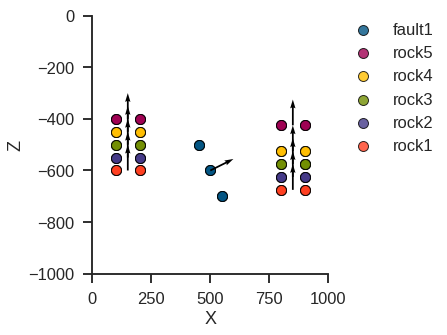

In [18]:
gp.plot.plot_data(geo_model, direction='y')

../../gempy/plot/visualization.py:305: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)
/home/miguel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


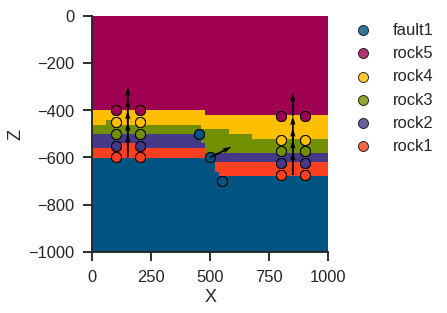

In [19]:
gp.plot.plot_section(geo_model, 25, block_type=geo_model.solutions.lith_block[:125000], plot_data=True)

Save model if changes were made:

In [20]:
#gp.compute_model(geo_model, compute_mesh=False)

In [22]:
geo_model.save_model('Tutorial_ch1-9a_Fault_relations')

Directory already exists, files will be overwritten


True